# Análise

## Introdução

Tabelas hash são estruturas de dados eficientes, amplamente utilizadas por proporcionarem acesso rápido, inserção e exclusão de elementos. Este relatório investiga a estrutura de dados da tabela hash, focando nas estratégias de resolução de colisões - endereçamento aberto e encadeamento separado - e no papel crucial das funções hash no desempenho geral das tabelas. Abordaremos também exemplos de algoritmos de hashing eficientes e subótimos.

O endereçamento aberto resolve colisões com buscas sequenciais na tabela, enquanto o encadeamento separado utiliza listas encadeadas em cada índice para armazenar elementos colidentes. Funções hash eficazes, como MurmurHash e CityHash, distribuem uniformemente as chaves no array, garantindo operações eficientes. Funções hash ruins, como simples operações de módulo, resultam em distribuição desigual e menor eficiência.

## Bibliotecas desenvolvidas

Para a presente analise, foi desenvolvido pelo grupo três bibliotecas escritas em **C+** com **bindings** para a linguagem python:

*    **picods**: Biblioteca para visualização de dados em gráficos e tabelas.
*    **pydaa**: Biblioteca para Projeto e analise de algoritmos, que contém as implementações do problema da mochila binária.
*    **pyaon**: Biblioteca auxiliar para a leitura de arquivos de entrada do problema. 

Sendo assim, para instalar essas libs:

In [ ]:
!pip install picods pydaa pyaon

E importar as funções utilizadas:

In [ ]:
import os

# plots and tables
from picods import picoplot
from picods import picotable

# File parsing
from pyaon.hashing import (dump, load)

# Algorithms
from pydaa.hashing import (open_addressing_hash_table, separate_chaining_hash_table)

## Arquivos de entrada

O diretório `./data` contém todos os arquivos utilizados na analise. Esse diretório contém outros dois subdiretórios, `./data/build` e `./data/search`, que respectivamente são utilizados com entradas para construção(inserção de valores) e busca nas tabelas hash.

Cada arquivo tem o nome no formato _N.txt_, onde _N_ denota a escala do problema, ou seja, a quantidade de itens. Por exemplo, um arquivo `50.txt` possui como conteúdo:

```text
3	42	5	48	42 ...	13	3	20	12	37	
```

Traduzindo esse arquivo como entrada de uma instância do problema, temos a inserção ou busca de 50 itens na tabela hash.

## Tratamento dos dados

Dessa forma, aplicando uma série de funções compostas, podemos ler as entradas para cada instância do problema contidas nos arquivos, obtendo assim os dados: **tempo de execução**, **Resultado obtido** e **sequência de itens a serem inseridos na mochila**:

In [3]:
data = list(
    map(
        lambda x: [
            x["size"],
            x["dynamic"][0].microseconds,
            x["greedy"][0].microseconds,
            x["dynamic"][1],
            x["greedy"][1],
        ],
        map(
            lambda x: {
                "size":
                x["size"],
                "dynamic":
                dynamic_knapsack(x["data"][0], x["data"][1], x["data"][2]),
                "greedy":
                greedy_knapsack(x["data"][0], x["data"][1], x["data"][2]),
            },
            sorted(
                map(
                    lambda x: {
                        "size": int("".join(filter(str.isdigit, x))),
                        "data": read_knapsack(f"./data/{x}"),
                    },
                    os.listdir("data"),
                ),
                key=lambda x: x["size"],
            ),
        ),
    ))


## Analise dos Dados e Discussão

Dessa forma, tendo os dados da resolução de cada instância do problema, podemos prosseguir com a analise desses.

A tabela a seguir mostra, para cada instância do problema, seu tempo de execução e resultado obtido, dentro de cada uma das duas abordagens:

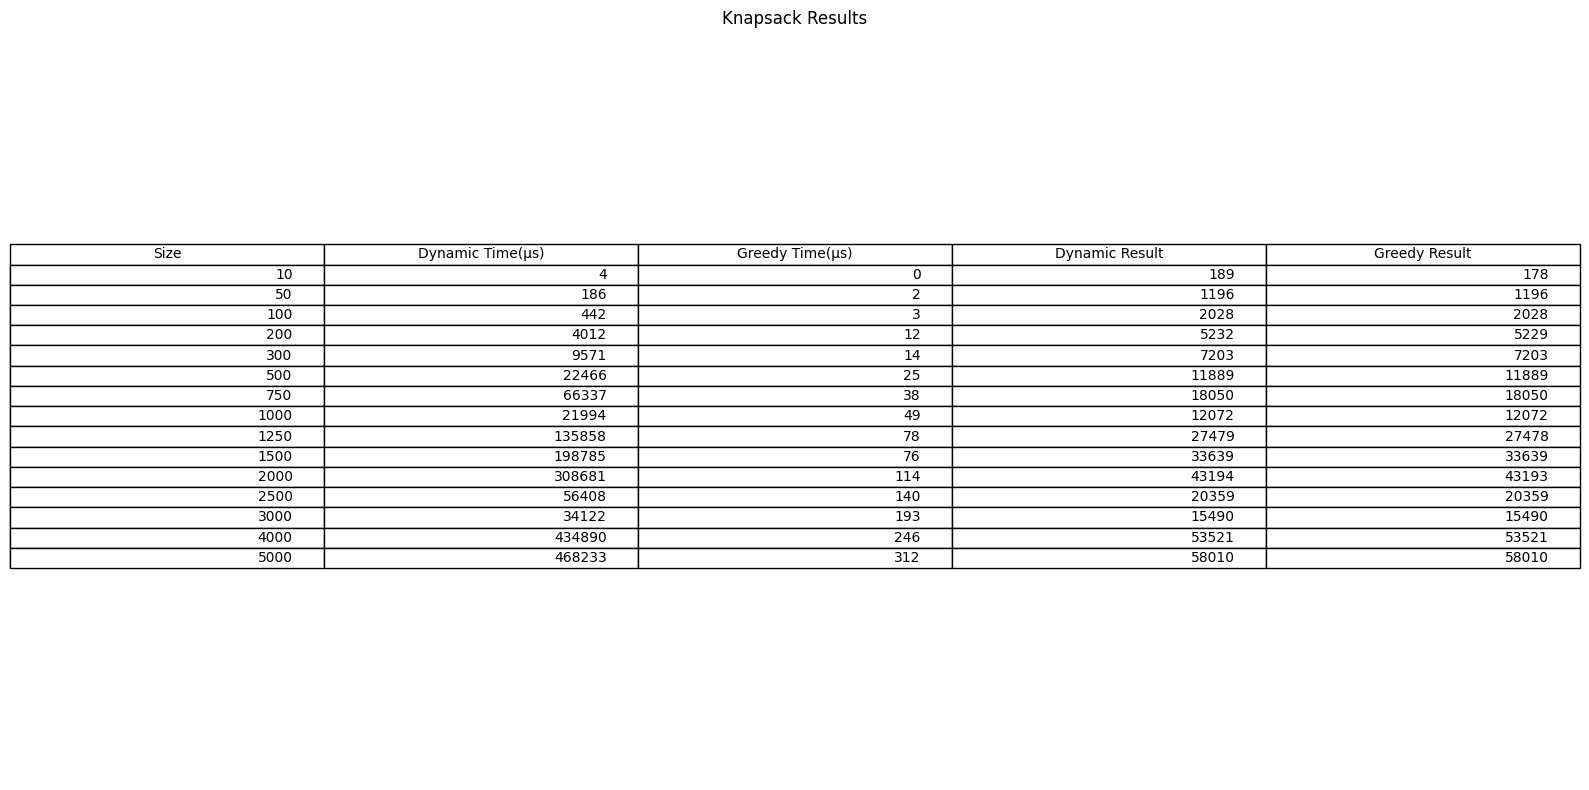

In [4]:
picotable(
    "Knapsack Results",
    data,
    [
        "Size",
        "Dynamic Time(μs)",
        "Greedy Time(μs)",
        "Dynamic Result",
        "Greedy Result",
    ],
    ["" for i in range(len(data))],
)


Em uma primeira análise, pode se ver que o método guloso obteve algumas vezes resultados diferentes do método de programação dinâmica.

Além do mais, pode-se ver que o tempo de execução do método de programação dinâmica foi muito maior do que a sua contraparte gulosa.

Seguindo, o gráfico de **tempo** x **tamanho** para cada abordagem do problema pode ser visto a seguir: 

### Abordagem Gulosa

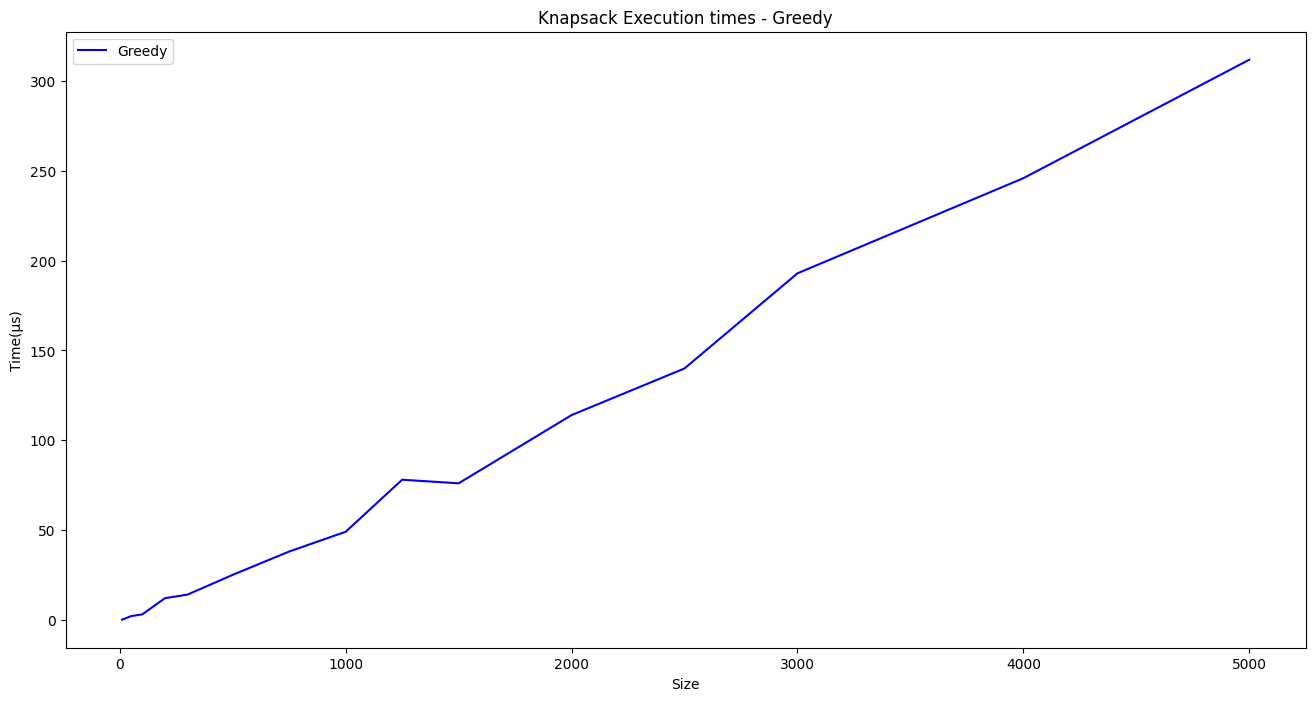

In [5]:
picoplot(
    "Knapsack Execution times - Greedy",
    [
        [i[2] for i in data],
    ],
    [[i[0] for i in data]],
    ["Greedy"],
    ["blue"],
    "Size",
    "Time(μs)",
)

### Abordagem dinamica

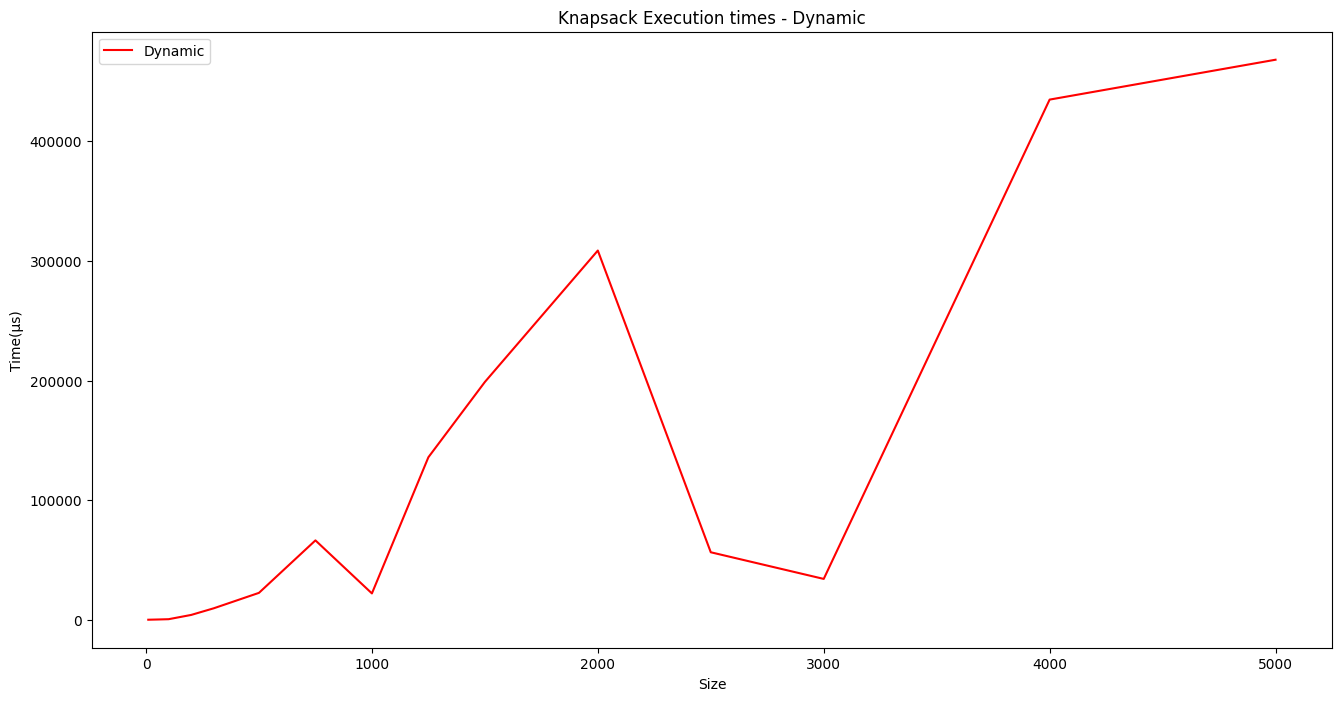

In [6]:
picoplot(
     "Knapsack Execution times - Dynamic",
     [
         [i[1] for i in data],
     ],
     [[i[0] for i in data]],
     ["Dynamic"],
     ["red"],
     "Size",
     "Time(μs)",
)

Observando os dois gráficos, e possível notar que, apesar das duas abordagens terem uma sequência de crescimento parecida, a abordagem **dinâmica teve tempos muito discrepantes em relação a abordagem gulosa**. Essa observação pode ser confirmada ao comparar os dois gráficos:

### Comparação

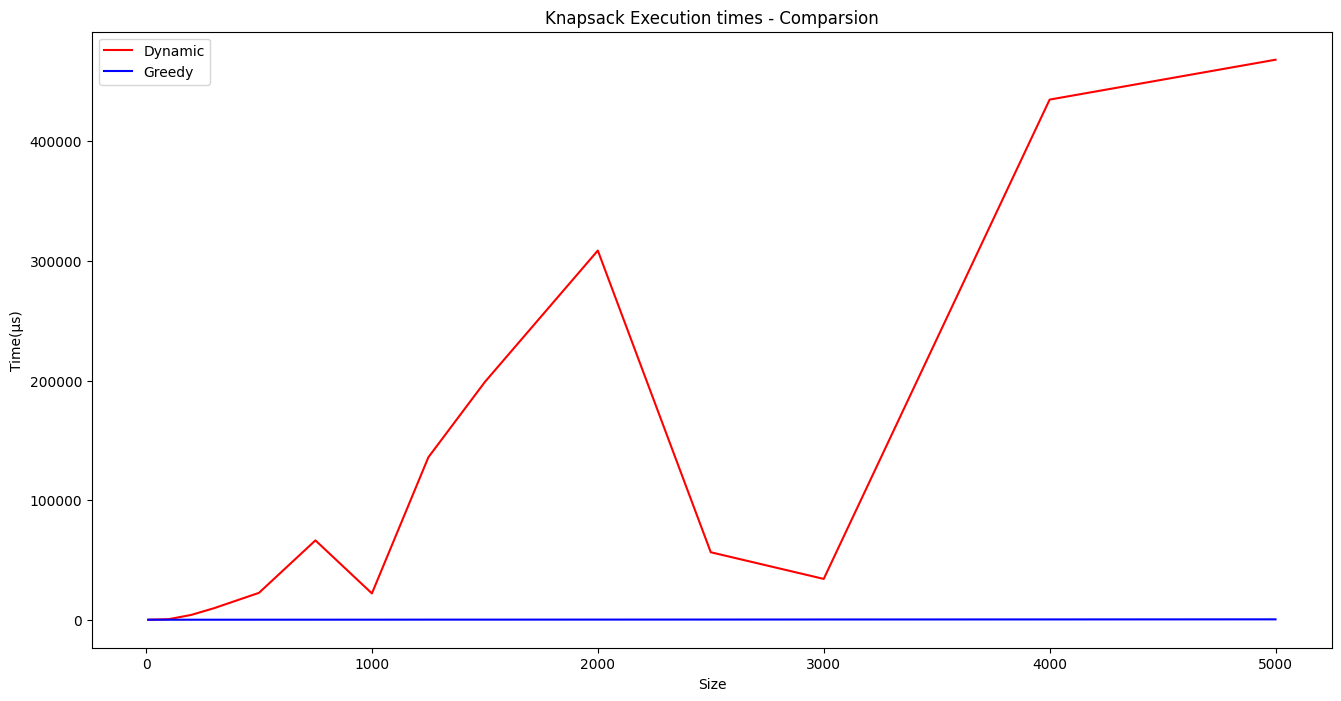

In [7]:
picoplot(
    "Knapsack Execution times - Comparsion",
    [
        [i[1] for i in data],
        [i[2] for i in data],
    ],
    [[i[0] for i in data], [i[0] for i in data]],
    ["Dynamic", "Greedy"],
    ["red", "blue"],
    "Size",
    "Time(μs)",
)


## Conclusões

Observando a tabela de resultados, afirma-se o caráter heurístico da estratégia gulosa, ou seja, o fato dela não garantir a obtenção de um resultado ótimo, apenas uma aproximação. 

Apesar disso, ao observar a tabela de dados e a tendência de crescimento dos tempos nos gráficos, fica muito claro que, para uma instância de tamanho _n_ e capacidade _w_, a estratégia gulosa foi muito mais répida, provando a sua complexidade algorítmica de **O(nlogn)** contra os resuldados muito maiores da estratégia dinamica, que por sua vez possui complexidade **O(nw)**.